In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Import and read a 311 NYC service request.
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',header=0, sep=',',parse_dates=['Created Date','Closed Date','Resolution Action Updated Date'])



In [3]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [4]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type        

In [6]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',header=0, sep=',',parse_dates=['Created Date','Closed Date','Resolution Action Updated Date'], index_col='Unique Key')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 32310363 to 30281825
Data columns (total 52 columns):
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      297883 non-null object
City      

### Findin out the missing values column

In [8]:
(df.isnull().sum() / len(df)) * 100

Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution Action Updated Date      0.727308
Community 

### Remove Null Value Column

In [9]:
df3=df.dropna(axis = 'columns', how = 'all')

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 32310363 to 30281825
Data columns (total 47 columns):
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      297883 non-null object
City      

In [11]:
df3.shape


(300698, 47)

In [12]:
df.shape

(300698, 52)

In [13]:
df4=df.dropna(thresh=df.shape[0]*0.9,how='all',axis=1)

In [14]:

(df4.isnull().sum() / len(df)) * 100


Created Date                      0.000000
Closed Date                       0.719659
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        1.966757
Location Type                     0.043565
Incident Zip                      0.869643
Address Type                      0.936155
City                              0.869311
Facility Type                     0.721987
Status                            0.000000
Due Date                          0.000998
Resolution Description            0.000000
Resolution Action Updated Date    0.727308
Community Board                   0.000000
Borough                           0.000000
X Coordinate (State Plane)        1.177261
Y Coordinate (State Plane)        1.177261
Park Facility Name                0.000000
Park Borough                      0.000000
School Name                       0.000000
School Number                     0.000000
School Regi

#### Covert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’

In [15]:
df.describe()

,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [16]:
df.shape

(300698, 52)

In [17]:
df['Request_Closing_Time']=df['Closed Date']-df['Created Date']

In [18]:
df.shape

(300698, 53)

### 3. 
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [19]:
# Major insights
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [20]:
#Insite1:Majority of complaints
insite1= df[['Complaint Type','Agency']].groupby('Complaint Type').count()

In [21]:
insite1

,Agency
Complaint Type,
Agency Issues,6
Animal Abuse,7778
Animal in a Park,1
Bike/Roller/Skate Chronic,427
Blocked Driveway,77044
Derelict Vehicle,17718
Disorderly Youth,286
Drinking,1280
Ferry Complaint,2


In [22]:
# Rename Agency column to  Entries
insite1.rename(columns={'Agency': 'Entries'}, inplace= True)
insite1.sort_values('Entries', inplace= True, ascending= False)

In [23]:
insite1.head(10)

,Entries
Complaint Type,
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416


#### Graphical Representation

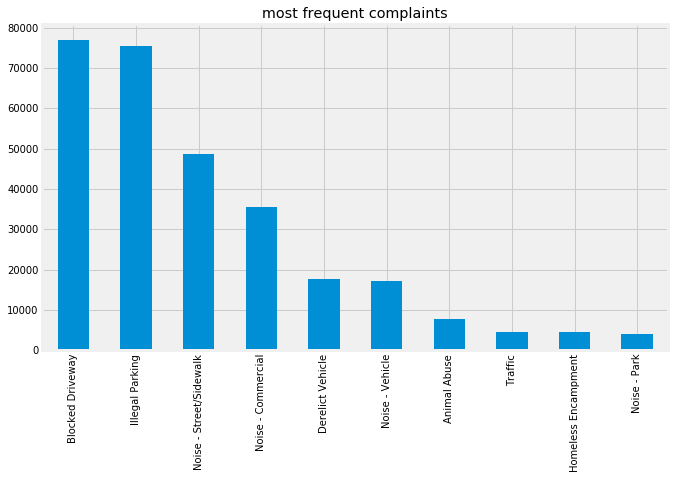

In [24]:
# Complaint type with bar plot to figure out majority of complaint types and top 10 complaints
(df['Complaint Type'].value_counts()).head(10).plot(kind='bar',figsize=(10,6), title='most frequent complaints')


## Insite2: Finding out maximum complaints Comming from which cities

In [25]:
insite2=df[['City','Agency']].groupby('City').count()

In [26]:
insite2.rename(columns= {'Agency':'Entries'}, inplace=True)

In [27]:
insite2.sort_values('Entries', inplace= True, ascending= False )

In [28]:
insite2.head(10)

,Entries
City,
BROOKLYN,98307
NEW YORK,65994
BRONX,40702
STATEN ISLAND,12343
JAMAICA,7296
ASTORIA,6330
FLUSHING,5971
RIDGEWOOD,5163
CORONA,4295



## insite3

In [29]:
# pie graph for most frequent complaints cities
# complaints distribution across Boroughs
df.Borough.unique

<bound method Series.unique of Unique Key
32310363      MANHATTAN
32309934         QUEENS
32309159          BRONX
32305098          BRONX
32306529         QUEENS
               ...     
30281872    Unspecified
30281230         QUEENS
30283424       BROOKLYN
30280004          BRONX
30281825      MANHATTAN
Name: Borough, Length: 300698, dtype: object>

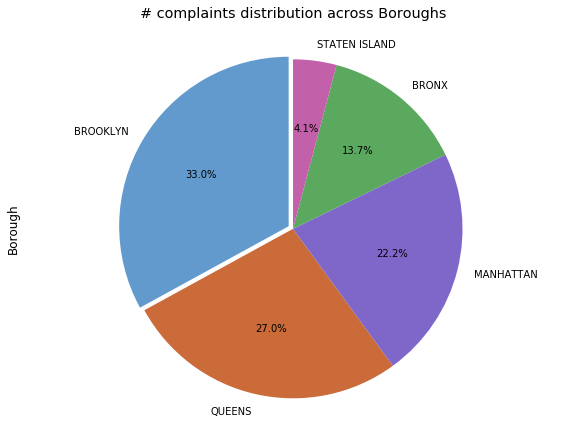

In [30]:
# complaints distribution across Boroughs
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df['Borough'].value_counts().head(5).plot(kind='pie', autopct= '%1.1f%%', figsize=(8,6), explode=(0.03, 0, 0, 0, 0), startangle=90, shadow=False, colors=colors)
plt.axis('equal')
plt.title('# complaints distribution across Boroughs\n')
plt.tight_layout()
plt.show()

In [31]:
# Analysis of city which has heighest number of complaints
df_brouklyn=df[df['Borough']=='BROOKLYN']

In [32]:
df_brouklyn.shape

(98307, 53)

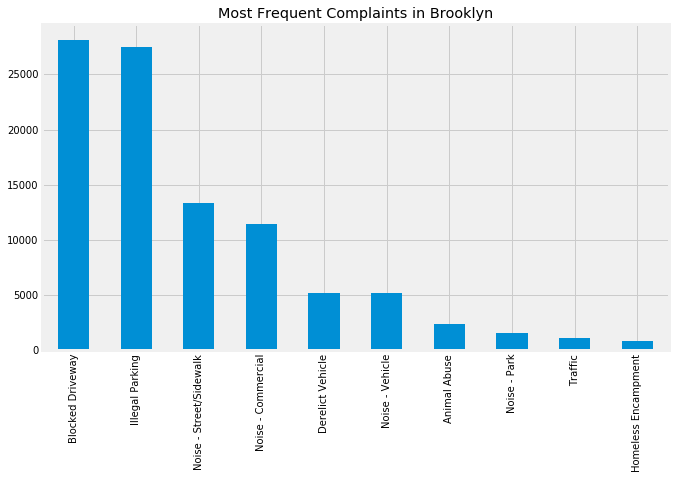

In [33]:
#Anlysis of Most Frequent complaint in Brooklyn
(df_brouklyn['Complaint Type'].value_counts()).head(10).plot(kind='bar', figsize=(10,6), title = 'Most Frequent Complaints in Brooklyn')

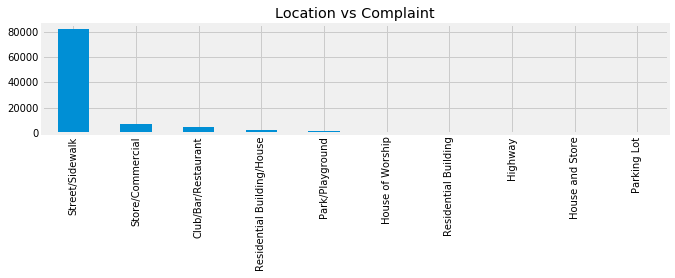

In [34]:
# Location and complaint
(df_brouklyn['Location Type'].value_counts()).head(10).plot(kind='bar',figsize=(10,2), title='Location vs Complaint' )

In [35]:
# Analysis of most frequent complaint type in brooklyn
df_Brook_blocked = df_brouklyn[df_brouklyn['Complaint Type'] == 'Blocked Driveway']

In [36]:
df_Brook_blocked.shape

(28148, 53)

(-74.04069667018493, -73.85577605981507, 40.57286021, 40.73822772)

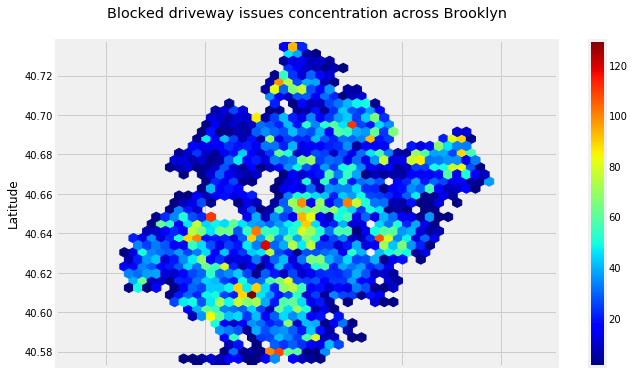

In [37]:
df_Brook_blocked.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40, title = 'Blocked driveway issues concentration across Brooklyn\n', colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

In [41]:
df['Resolution_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 32310363 to 30281825
Data columns (total 54 columns):
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      297883 non-null object
City      

In [43]:
df.tail()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Resolution_Time
Unique Key,,,,,,,,,,,,,,,,,,,,,
30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)",04:08:49,14929.0


In [46]:
df['Resolution_Time']

Unique Key
32310363     3315.0
32309934     5176.0
32309159    17491.0
32305098    27914.0
32306529    12422.0
             ...   
30281872        NaN
30281230     7231.0
30283424    11237.0
30280004    14733.0
30281825    14929.0
Name: Resolution_Time, Length: 300698, dtype: float64

In [53]:
df.loc[:,"Resolution_Time"].isnull().count()

300698

In [54]:
df.loc[:,"Resolution_Time"].shape


(300698,)

In [55]:
df.loc[:,"Resolution_Time"].isnull().sum()

2164

In [56]:
df.loc[:,'Resolution_Time'].notnull().sum()

298534

In [57]:
df_clean=df[df['Resolution_Time'].notnull()]

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 32310363 to 30281825
Data columns (total 54 columns):
Created Date                      298534 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            298534 non-null object
Agency Name                       298534 non-null object
Complaint Type                    298534 non-null object
Descriptor                        292625 non-null object
Location Type                     298406 non-null object
Incident Zip                      298027 non-null float64
Incident Address                  254137 non-null object
Street Name                       254137 non-null object
Cross Street 1                    250971 non-null object
Cross Street 2                    250881 non-null object
Intersection Street 1             43440 non-null object
Intersection Street 2             43354 non-null object
Address Type                      297827 non-null object
City      

In [63]:
df_perfect=df_clean[df_clean['Closed Date']>=df_clean['Created Date']]

In [66]:
df_perfect.shape

(298534, 54)

In [67]:
df_clean.shape

(298534, 54)

In [77]:
df_clean[df_clean['Closed Date']>=df_clean['Created Date']].shape

(298534, 54)

In [78]:
df_perfect['Day of Week']=df_perfect['Created Date'].dt.dayofweek

In [80]:
df_perfect['Day of Week']

Unique Key
32310363    3
32309934    3
32309159    3
32305098    3
32306529    3
           ..
30281370    6
30281230    6
30283424    6
30280004    6
30281825    6
Name: Day of Week, Length: 298534, dtype: int64

In [85]:
df_perfect.shape

(298534, 56)

In [86]:
df_perfect['Day of Month']=df_perfect['Created Date'].dt.day

In [87]:
df_perfect.shape

(298534, 56)

In [88]:
df_perfect['Month']=df_perfect['Created Date'].dt.month

In [89]:
df_perfect.shape

(298534, 57)

In [90]:
df_perfect['Year'] = df_perfect['Created Date'].dt.year

In [91]:
df_perfect.shape

(298534, 58)

In [93]:
df_perfect['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

In [101]:
df_perfect=df_perfect[df_perfect.Borough!='Unspecified']

In [102]:
df_perfect['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

### Volume of Blocked driveway issues by Month

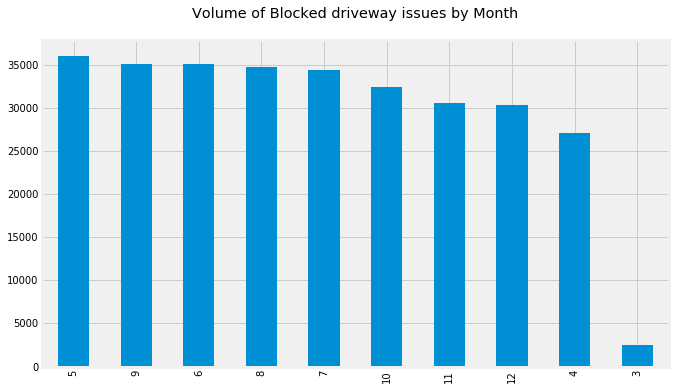

In [103]:
df_perfect['Month'].value_counts().head(10).plot(kind='bar', figsize=(10,6), title = 'Volume of Blocked driveway issues by Month\n')

In [109]:
df_brooklyn=df_perfect[df_perfect['Borough']=='BROOKLYN']

In [110]:
df_brooklyn.shape

(98295, 58)

#### Volume of Blocked driveway issues by Month in Brooklyn

In [112]:
dr_br_block=df_brooklyn[df_brooklyn['Complaint Type'] == 'Blocked Driveway']

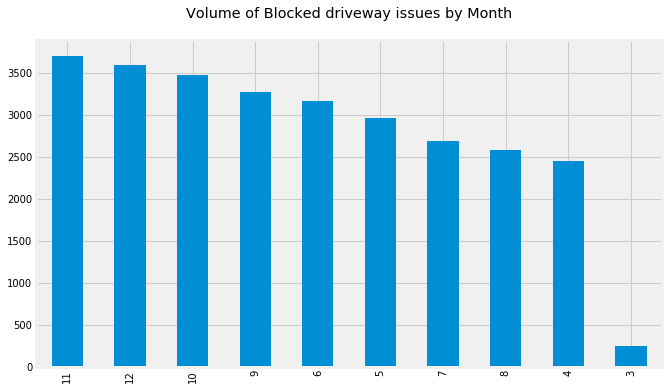

In [113]:
dr_br_block['Month'].value_counts().head(10).plot(kind='bar', figsize=(10,6), title = 'Volume of Blocked driveway issues by Month\n')

In [114]:
df_brooklyn.shape

(98295, 58)

### Request_Closing_Time’ in Seconds, grouping them for different locations, order by complaint type

In [130]:
df_avg_response_time=(df_perfect.groupby(['City','Complaint Type']).Resolution_Time.mean()).sort_values(ascending=False)

In [131]:
df_avg_response_time.head(25)

City                 Complaint Type           
QUEENS VILLAGE       Graffiti                     192000.000000
BELLEROSE            Homeless Encampment          140880.000000
SOUTH RICHMOND HILL  Bike/Roller/Skate Chronic    111277.000000
OAKLAND GARDENS      Homeless Encampment          103140.000000
FLORAL PARK          Animal Abuse                  95696.500000
CAMBRIA HEIGHTS      Homeless Encampment           82042.000000
SPRINGFIELD GARDENS  Posting Advertisement         70206.500000
ROSEDALE             Homeless Encampment           67906.250000
BELLEROSE            Derelict Vehicle              61805.314607
FLORAL PARK          Derelict Vehicle              59957.535714
CAMBRIA HEIGHTS      Derelict Vehicle              57998.800000
QUEENS VILLAGE       Derelict Vehicle              57877.605405
MIDDLE VILLAGE       Bike/Roller/Skate Chronic     56456.000000
GLEN OAKS            Derelict Vehicle              54881.959184
SPRINGFIELD GARDENS  Animal Abuse                  53503.

### Average response time across complaint types in seconds

In [143]:
avg_response_time=(df_perfect.groupby(['Complaint Type']).Resolution_Time.mean()).sort_values(ascending=True)

In [144]:
avg_response_time.head(25)

Complaint Type
Posting Advertisement         7112.891975
Illegal Fireworks             9940.101190
Noise - Commercial           11291.632884
Noise - House of Worship     11495.874058
Noise - Park                 12246.158157
Noise - Street/Sidewalk      12377.738882
Traffic                      12415.252002
Disorderly Youth             12810.902098
Noise - Vehicle              12918.914430
Urinating in Public          13055.991554
Bike/Roller/Skate Chronic    13523.545024
Drinking                     13879.309748
Vending                      14449.060358
Squeegee                     14564.250000
Homeless Encampment          15716.052536
Panhandling                  15741.963934
Illegal Parking              16149.479466
Blocked Driveway             17057.298659
Animal Abuse                 18768.513712
Graffiti                     25744.504425
Derelict Vehicle             26445.913579
Name: Resolution_Time, dtype: float64

   ### from the above result  we can consider that null hypothesis can be rejected, since average response time across complaint type is not equal

In [145]:
# Are the type of complaint or service requested and location related?

### Following complains have resolution times which are very close. Disorderly Youth 12810.902098 Noise - Vehicle 12918.914430 One group can be formed for these complaints and one way Anova for this can be performed

In [147]:
df_perfect['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'],
      dtype=object)

In [149]:
df_disorderyouth=df_perfect[df_perfect['Complaint Type']=='Disorderly Youth']

In [150]:
df_disorderyouth=df_disorderyouth.loc[:,['Resolution_Time']]

In [152]:
df_disorderyouth.head()

,Resolution_Time
Unique Key,
32274507,713.0
32244468,4605.0
32225263,2345.0
32227341,19415.0
32191432,6849.0


In [153]:
df_noiseveh = df_perfect[df_perfect['Complaint Type']=='Noise - Vehicle']
df_noiseveh = df_noiseveh.loc[:,['Resolution_Time']]
df_noiseveh.head()

,Resolution_Time
Unique Key,
32307159,22949.0
32308722,7254.0
32308107,11319.0
32308108,10937.0
32306622,2615.0


In [155]:
df_typeres=df_perfect.loc[:,['Complaint Type','Resolution_Time']]

In [157]:
df_typeres.head()

,Complaint Type,Resolution_Time
Unique Key,,
32310363,Noise - Street/Sidewalk,3315.0
32309934,Blocked Driveway,5176.0
32309159,Blocked Driveway,17491.0
32305098,Illegal Parking,27914.0
32306529,Illegal Parking,12422.0


In [158]:
df_typeres.columns

Index(['Complaint Type', 'Resolution_Time'], dtype='object')

In [162]:
# stats f_oneway functions takes the groups as input and returns F and P-value
f_value,p_value=stats.f_oneway(df_disorderyouth,df_noiseveh)

In [186]:
p_value

array([0.91269878])

#### Null hypothesis to be accepted for Disorderly Youth and Noise - Vehicle p-value close to 1

#### One Way Anova for Posting Advertisement and Derelict Vehicle

In [167]:
df_postad = df_perfect[df_perfect['Complaint Type']=='Posting Advertisement']
df_postad = df_postad.loc[:,['Resolution_Time']]
df_postad.head()

,Resolution_Time
Unique Key,
32306752,7596.0
32307464,7745.0
32308949,7834.0
32307323,8042.0
32306034,8137.0


In [168]:
df_derveh = df_perfect[df_perfect['Complaint Type']=='Derelict Vehicle']
df_derveh = df_derveh.loc[:,['Resolution_Time']]
df_derveh.head()

,Resolution_Time
Unique Key,
32309424,37763.0
32306497,14221.0
32305124,4913.0
32308002,14879.0
32305798,2712.0


In [170]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df_postad,df_derveh) 
pvalue

array([7.28776953e-35])

### Null hypothesis for Posting Advertisement and Derelict Vehicle to be rejected p-value < 0.05¶

#### Anova table for complain type and resolution time

In [171]:
# get ANOVA table for complain type and resolution time
# reshape the d dataframe suitable for statsmodels package 
df_perfect['Complaint_Type']=df_perfect['Complaint Type']


In [172]:
df_perfect['Complaint_Type']

Unique Key
32310363    Noise - Street/Sidewalk
32309934           Blocked Driveway
32309159           Blocked Driveway
32305098            Illegal Parking
32306529            Illegal Parking
                     ...           
30281370         Noise - Commercial
30281230           Blocked Driveway
30283424         Noise - Commercial
30280004         Noise - Commercial
30281825         Noise - Commercial
Name: Complaint_Type, Length: 298068, dtype: object

In [173]:
df_type_res = df_perfect.loc[:, ['Complaint_Type','Resolution_Time']]  #Complaint Type

In [174]:
df_type_res

,Complaint_Type,Resolution_Time
Unique Key,,
32310363,Noise - Street/Sidewalk,3315.0
32309934,Blocked Driveway,5176.0
32309159,Blocked Driveway,17491.0
32305098,Illegal Parking,27914.0
32306529,Illegal Parking,12422.0
...,...,...
30281370,Noise - Commercial,2309.0
30281230,Blocked Driveway,7231.0
30283424,Noise - Commercial,11237.0


In [176]:
# Ordinary Least Squares (OLS) model

model = ols('Resolution_Time ~ Complaint_Type', data=df_type_res).fit()

In [177]:
model

In [183]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [184]:
anova_table

,sum_sq,df,F,PR(>F)
Complaint_Type,3.784839e+12,20.0,410.258598,0.0
Residual,1.374816e+14,298047.0,NaN,NaN


####  Null Hypothesis to be rejected since p-value < 0.05